(array([5.75022748e-03, 0.00000000e+00, 2.87511374e-03, 2.87511374e-03,
        2.87511374e-03, 1.43755687e-02, 8.62534122e-03, 2.30009099e-02,
        2.58760237e-02, 4.02515923e-02, 7.47529572e-02, 8.62534122e-02,
        1.17879663e-01, 1.06379208e-01, 1.29380118e-01, 1.35130346e-01,
        1.69631711e-01, 2.73135805e-01, 2.32884213e-01, 3.47888762e-01,
        3.93890582e-01, 3.76639900e-01, 4.39892402e-01, 4.65768426e-01,
        4.34142175e-01, 4.94519563e-01, 5.52021838e-01, 6.44025478e-01,
        6.49775705e-01, 6.69901501e-01, 7.99281619e-01, 7.79155823e-01,
        8.05031847e-01, 8.28032757e-01, 8.68284349e-01, 8.91285259e-01,
        9.60287989e-01, 1.02066538e+00, 1.03791606e+00, 1.15004550e+00,
        1.14142015e+00, 1.30530164e+00, 1.26792516e+00, 1.25642470e+00,
        1.33692789e+00, 1.45193244e+00, 1.46630801e+00, 1.53531074e+00,
        1.62156415e+00, 1.64744017e+00, 1.74231893e+00, 1.69056688e+00,
        1.89182484e+00, 1.77682029e+00, 1.97807825e+00, 1.868823

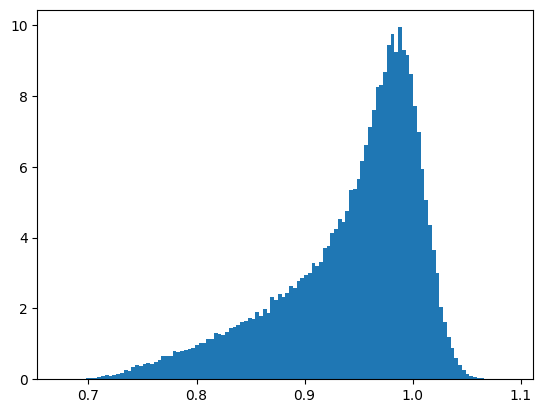

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.hist import hist as fancyhist

mean = 1
std = 0.02


chi = np.random.uniform(0, 1, 100000)

M = np.random.normal(mean, std, 100000)

M_irr = M*np.sqrt((1+np.sqrt(1-chi**2))/2)

x = np.linspace(min(M_irr), max(M_irr))

fancyhist(M_irr, bins="freedman", density=True)

In [3]:
from sklearn.neighbors import KernelDensity

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, 
                            kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

KDE = kde_sklearn(M_irr,bandwidth=0.1,kernel="linear") 


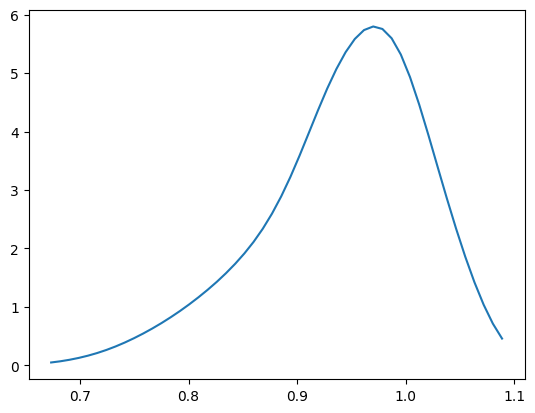

In [4]:
plt.plot(x, KDE) 

In [5]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import uniform
import scipy.stats
from scipy import optimize
from astroML import stats as astroMLstats

f = np.sqrt((1+np.sqrt(1-chi**2))/2)
print(stats.ks_2samp(M_irr, f))

KstestResult(statistic=0.15729000000000004, pvalue=0.0, statistic_location=0.9999999999977953, statistic_sign=-1)


In [11]:
#do it for many sigmas

sigmas = np.linspace(0, 0.5, 100)
ks_Mirr_f = []
ks_Mirr_M = []

for i in sigmas:
    M = np.random.normal(mean, i, 100000)
    M_irr = M*np.sqrt((1+np.sqrt(1-chi**2))/2)
    f = M_irr/M
    
    ks_Mirr_f.append(scipy.stats.kstest(M_irr, f))
    ks_Mirr_M.append(scipy.stats.kstest(M_irr, M))
    

In [15]:
print(ks_Mirr_f[1])
a = np.array(ks_Mirr_f)
b = np.array(ks_Mirr_M)
print(a)

KstestResult(statistic=0.08135999999999999, pvalue=2.372929366206186e-288, statistic_location=0.9999999999977953, statistic_sign=-1)
[[0.00000000e+000 1.00000000e+000]
 [8.13600000e-002 2.37292937e-288]
 [1.15980000e-001 0.00000000e+000]
 [1.39690000e-001 0.00000000e+000]
 [1.57910000e-001 0.00000000e+000]
 [1.77950000e-001 0.00000000e+000]
 [1.92610000e-001 0.00000000e+000]
 [2.06580000e-001 0.00000000e+000]
 [2.17200000e-001 0.00000000e+000]
 [2.28030000e-001 0.00000000e+000]
 [2.38220000e-001 0.00000000e+000]
 [2.49260000e-001 0.00000000e+000]
 [2.59620000e-001 0.00000000e+000]
 [2.67470000e-001 0.00000000e+000]
 [2.71480000e-001 0.00000000e+000]
 [2.78310000e-001 0.00000000e+000]
 [2.87830000e-001 0.00000000e+000]
 [2.96220000e-001 0.00000000e+000]
 [3.00650000e-001 0.00000000e+000]
 [3.06690000e-001 0.00000000e+000]
 [3.12930000e-001 0.00000000e+000]
 [3.18230000e-001 0.00000000e+000]
 [3.21870000e-001 0.00000000e+000]
 [3.28620000e-001 0.00000000e+000]
 [3.32980000e-001 0.0000000

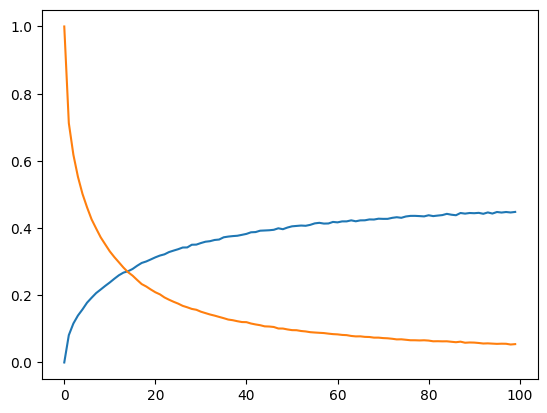

In [16]:
plt.plot(a[:,0])
plt.plot(b[:,0])